# MODUL 3 PRAKTIKUM SAINS DATA

### Outline

- Regresi Logistik

## Regresi Logistik

Pada modul sebelumnya regresi linear memprediksi suatu nilai yang bersifat numerik (kontinu, masalah regresi).

Regresi Logistik menggunakan konsep regresi untuk memprediksi suatu nilai yang bersifat kategorik (diskrit, masalah **klasifikasi**).

Regresi Logistik memberikan output berupa probabilitas suatu item termasuk kelas tertentu, menggunakan fungsi sigmoid sebagai berikut:
$$ h_\theta (x) = \sigma(\theta^T X) = \frac {e^{(\theta _0 + \theta _1 x_1 + \theta _2 x_2 + ...)}} {1 + e^{(\theta _0 + \theta _1 x_1 + \theta _2 x_2 + ...)}}$$


Probabilitas suatu kelas = $P(Y = 1|X) = \sigma(\theta^T X)= \frac {e^{\theta^T X}}{1 + e^{\theta^T X}}$

![](.\ssamodul322.jpg)

Suatu item akan diklasifikasikan berdasarkan probabilitas tertinggi yang diperoleh antara dua kelas.

Tujuan dari algoritma Regresi Logistik adalah untuk mencari terbaik sehingga model membuat prediksi yang cukup tepat dari kelas kelasyang ada.


In [2]:
#jika belum ada, insall dulu package scikit learn
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Module

In [3]:
#import modul modul yang diperlukan
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

### Import Data

Pada module kali ini, akan digunakan data csv Churn Data (`ChurnData.csv`) yang bisa didownload dari:

- [Google Drive](https://drive.google.com/file/d/1mDFhKuO91z6l785uAxNHrnFvpXavSgBG/view?usp=drive_link)

In [9]:
#memuat data frame dari Churn_data.csv
churn_df = pd.read_csv(".\ChurnData.csv")
churn_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ACER\AppData\Local\Temp\ipykernel_12160\3974188785.py:2: SyntaxWarning: invalid escape sequence '\C'
  churn_df = pd.read_csv(".\ChurnData.csv")


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Preprocessing

In [10]:
#ambil beberapa feature/kolom yang diduga berpengaruh terhadap churn
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [11]:
#ubah tipe value pada target (kolom churn) dari df tersebut menjadi integer
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


In [12]:
churn_df.shape

(200, 10)

In [13]:
#ubah value dari feature/kolom data frame menjadi array 2D untuk selanjutnya kita olah, set sebagai x
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [14]:
#ubah value dari feature/kolom data frame menjadi array 2D untuk selanjutnya kita olah, set sebagai Y
Y = np.asarray(churn_df['churn'])
Y[0:5]

array([1, 1, 0, 0, 0])

In [15]:
#import preprocessing
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) #normalisasi data
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Train/Test Split

In [16]:
#pisah data menjadi data latih dan data uji dengan perbandingan 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (160, 7) (160,)
Test set:  (40, 7) (40,)


### Membuat Model

In [17]:
#membuat model, gunakan LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#buat model regresi logistik, beri nama LR
#ada beberapa macam solver, contoh : newton-cg,lbfgs,liblinear,sag,saga
LR = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train, Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Prediksi

In [18]:
#prediksikan nilai y berdasarkan x pada data uji
yhat = LR.predict(X_test)
#hasil prediksi
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [19]:
#memprediksi probabilitas dari entri data frame (per baris)
yhat_prob = LR.predict_proba(X_test)
yhat_prob #sebelah kiri terhadap kelas 0, kanan terhadap kelas 1

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

### Evaluasi Model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
# code untuk membuat visualiasi confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  print(confusion_matrix(Y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
[[ 6  9]
 [ 1 24]]


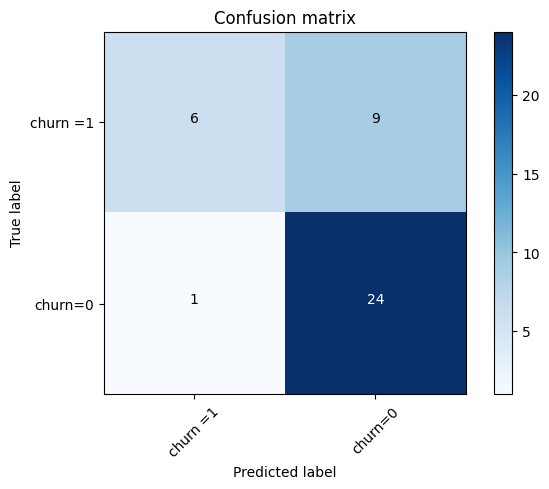

In [21]:
#confusion matrix
cnf = confusion_matrix(Y_test, yhat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf,classes=['churn =1', 'churn=0'],normalize = False, title='Confusion matrix')

In [22]:
print (classification_report(Y_test, yhat))
# Precission = TP/(TP+FP)
# recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [23]:
#log loss
from sklearn.metrics import log_loss
log_loss(Y_test,yhat_prob)

0.6017092478101185

In [24]:
#jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.7058823529411765